In [ ]:
Omar Fraij Pred Cenus Data for Income

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


Load Dataset

In [2]:

df = pd.read_csv("adult.csv")

print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataFrame info:")
print(df.info())

print("\nSummary of numeric columns:")
display(df.describe())

print("\nClass distribution for income:")
print(df["income"].value_counts())


Shape: (32561, 15)

First 5 rows:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary of numeric columns:


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Class distribution for income:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


Structure info

In [3]:
print("Missing values per column (NaN-based):")
print(df.isna().sum())

print("\nNumber of '?' values per column:")
for col in df.columns:
    if df[col].dtype == "object":
        num_q = (df[col] == "?").sum()
        if num_q > 0:
            print(f"{col}: {num_q}")

Missing values per column (NaN-based):
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Number of '?' values per column:
workclass: 1836
occupation: 1843
native.country: 583


Define numeric / categorical columns & clean “?” values

In [4]:
target_col = "income"

numeric_cols = [
    "age",
    "fnlwgt",
    "education.num",
    "capital.gain",
    "capital.loss",
    "hours.per.week",
]

categorical_cols = [
    "workclass",
    "education",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native.country",
]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Replace "?" with a clearer category name
for col in categorical_cols:
    df[col] = df[col].replace("?", "Unknown")

print("\nUnique values in workclass after cleaning:")
print(df["workclass"].unique())


Numeric columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

Unique values in workclass after cleaning:
['Unknown' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked']


EDA INFO

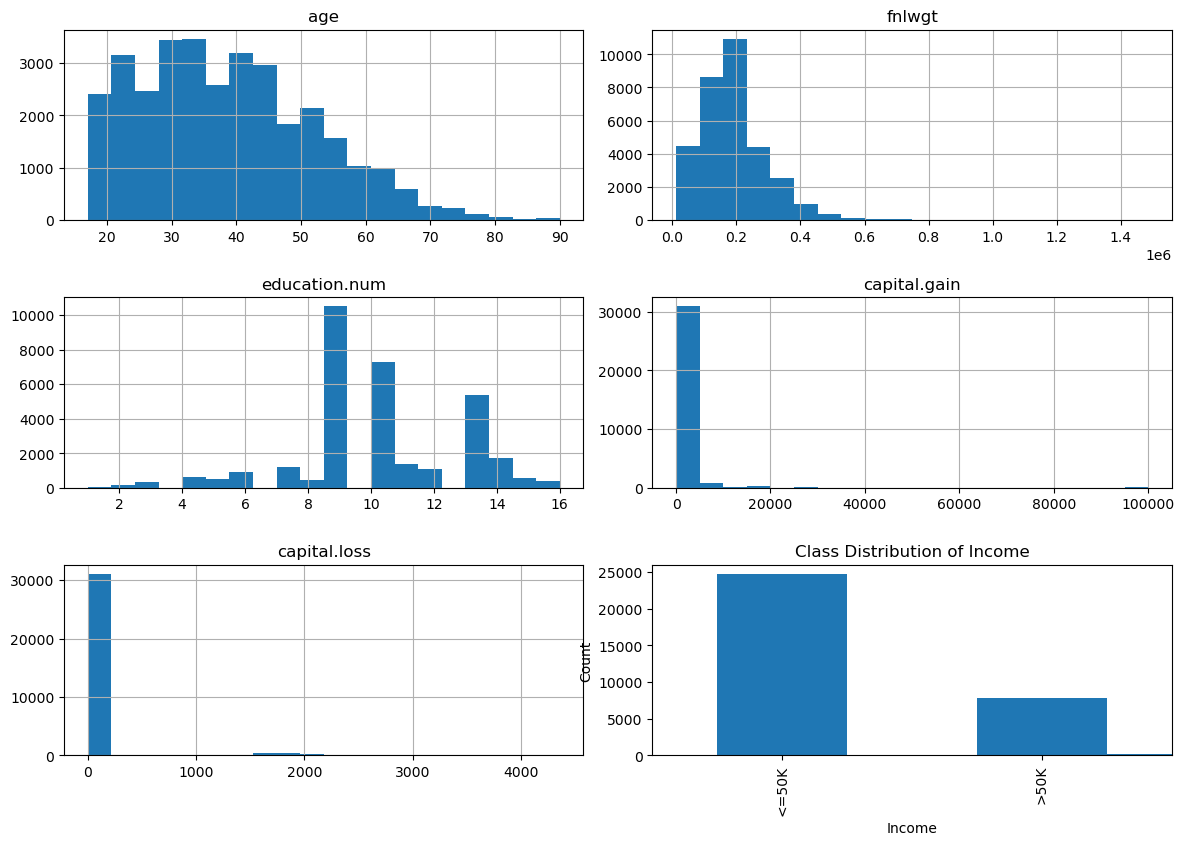

income,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


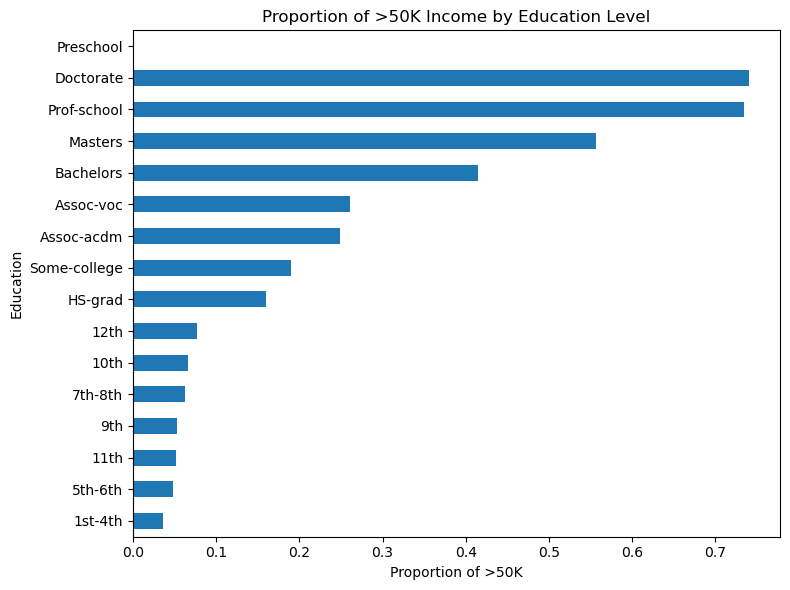

In [5]:
# Histogram of numeric features
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show

# Bar plot for income distribution
df[target_col].value_counts().plot(kind="bar")
plt.title("Class Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Proportion of >50K by education
income_by_edu = (
    df.groupby("education")[target_col]
      .value_counts(normalize=True)
      .unstack()
)

display(income_by_edu)

income_by_edu[">50K"].sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Proportion of >50K Income by Education Level")
plt.xlabel("Proportion of >50K")
plt.ylabel("Education")
plt.tight_layout()
plt.show()



Train Data

In [6]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[numeric_cols + categorical_cols]
y = (df[target_col] == ">50K").astype(int)  # 1 for >50K, 0 for <=50K

# Train+Val vs Test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Train vs Val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.2,
    stratify=y_train_val,
    random_state=42
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])


Train size: 20838
Validation size: 5210
Test size: 6513


PreProcess

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False    # dense output so GaussianNB can handle it
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)


Model 1 Logistic Regg

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])

log_reg_clf.fit(X_train, y_train)

y_val_pred = log_reg_clf.predict(X_val)
y_val_proba = log_reg_clf.predict_proba(X_val)[:, 1]

print("=== Logistic Regression: Validation Results ===")
print(classification_report(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))


=== Logistic Regression: Validation Results ===
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      3955
           1       0.57      0.83      0.68      1255

    accuracy                           0.81      5210
   macro avg       0.75      0.82      0.77      5210
weighted avg       0.85      0.81      0.82      5210

ROC-AUC: 0.8976348462030512


Model 2 Naive

In [9]:
from sklearn.naive_bayes import GaussianNB

nb_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", GaussianNB())
])

nb_clf.fit(X_train, y_train)

y_val_pred_nb = nb_clf.predict(X_val)
y_val_proba_nb = nb_clf.predict_proba(X_val)[:, 1]

print("=== Naive Bayes: Validation Results ===")
print(classification_report(y_val, y_val_pred_nb))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba_nb))


=== Naive Bayes: Validation Results ===
              precision    recall  f1-score   support

           0       0.97      0.36      0.52      3955
           1       0.32      0.96      0.48      1255

    accuracy                           0.50      5210
   macro avg       0.64      0.66      0.50      5210
weighted avg       0.81      0.50      0.51      5210

ROC-AUC: 0.7068934879949229


Confusion Matrix and ROC

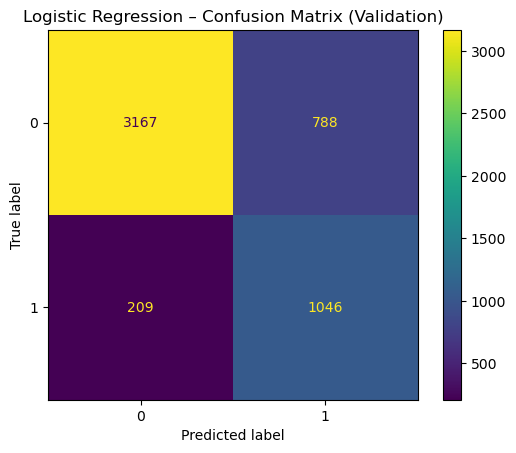

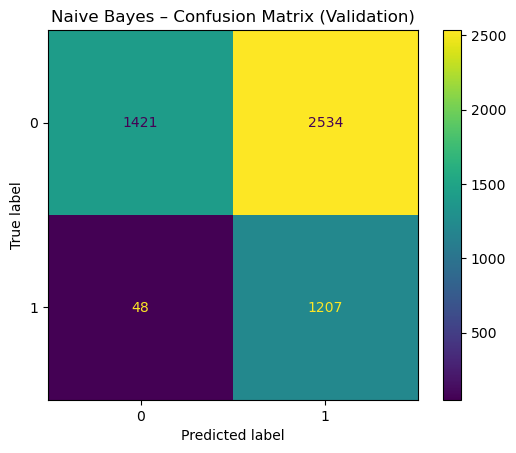

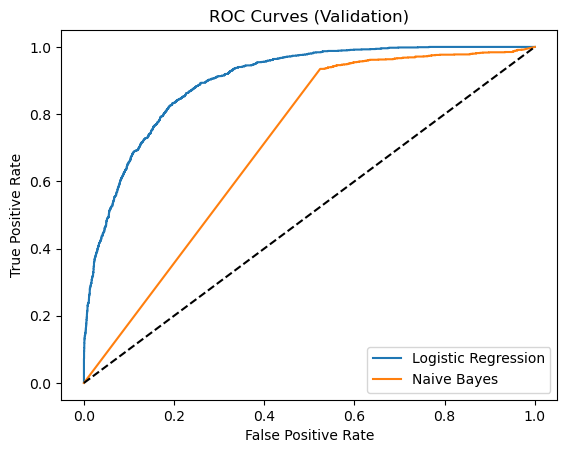

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

#matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)
plt.title("Logistic Regression – Confusion Matrix (Validation)")
plt.show()

#matrix for Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_nb)
plt.title("Naive Bayes – Confusion Matrix (Validation)")
plt.show()

#ROC curves
fpr_log, tpr_log, _ = roc_curve(y_val, y_val_proba)
fpr_nb, tpr_nb, _   = roc_curve(y_val, y_val_proba_nb)

plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Validation)")
plt.legend()
plt.show()


Final Training

In [11]:
# Retrain Logistic Regression on train+val
log_reg_clf_final = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])
log_reg_clf_final.fit(X_train_val, y_train_val)

y_test_pred = log_reg_clf_final.predict(X_test)
y_test_proba = log_reg_clf_final.predict_proba(X_test)[:, 1]

print("=== Logistic Regression: Test Results ===")
print(classification_report(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))


# Retrain Naive Bayes on train+val
nb_clf_final = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", GaussianNB())
])
nb_clf_final.fit(X_train_val, y_train_val)

y_test_pred_nb = nb_clf_final.predict(X_test)
y_test_proba_nb = nb_clf_final.predict_proba(X_test)[:, 1]

print("\n=== Naive Bayes: Test Results ===")
print(classification_report(y_test, y_test_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba_nb))


=== Logistic Regression: Test Results ===
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4945
           1       0.57      0.84      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513

ROC-AUC: 0.9046008646127814

=== Naive Bayes: Test Results ===
              precision    recall  f1-score   support

           0       0.96      0.41      0.57      4945
           1       0.34      0.95      0.50      1568

    accuracy                           0.54      6513
   macro avg       0.65      0.68      0.53      6513
weighted avg       0.81      0.54      0.55      6513

ROC-AUC: 0.7357529766203752


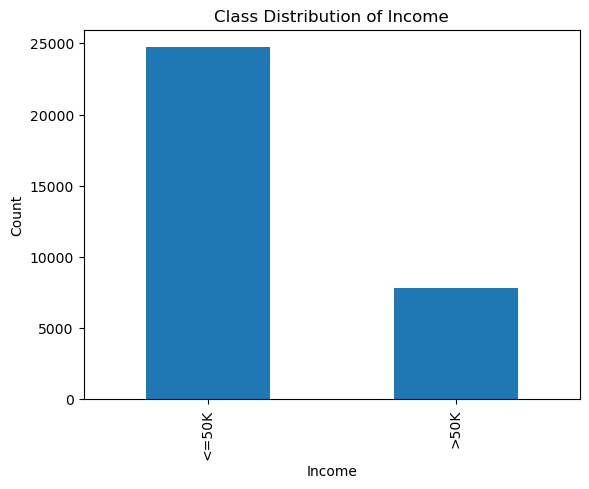

In [12]:
df[target_col].value_counts().plot(kind="bar")
plt.title("Class Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


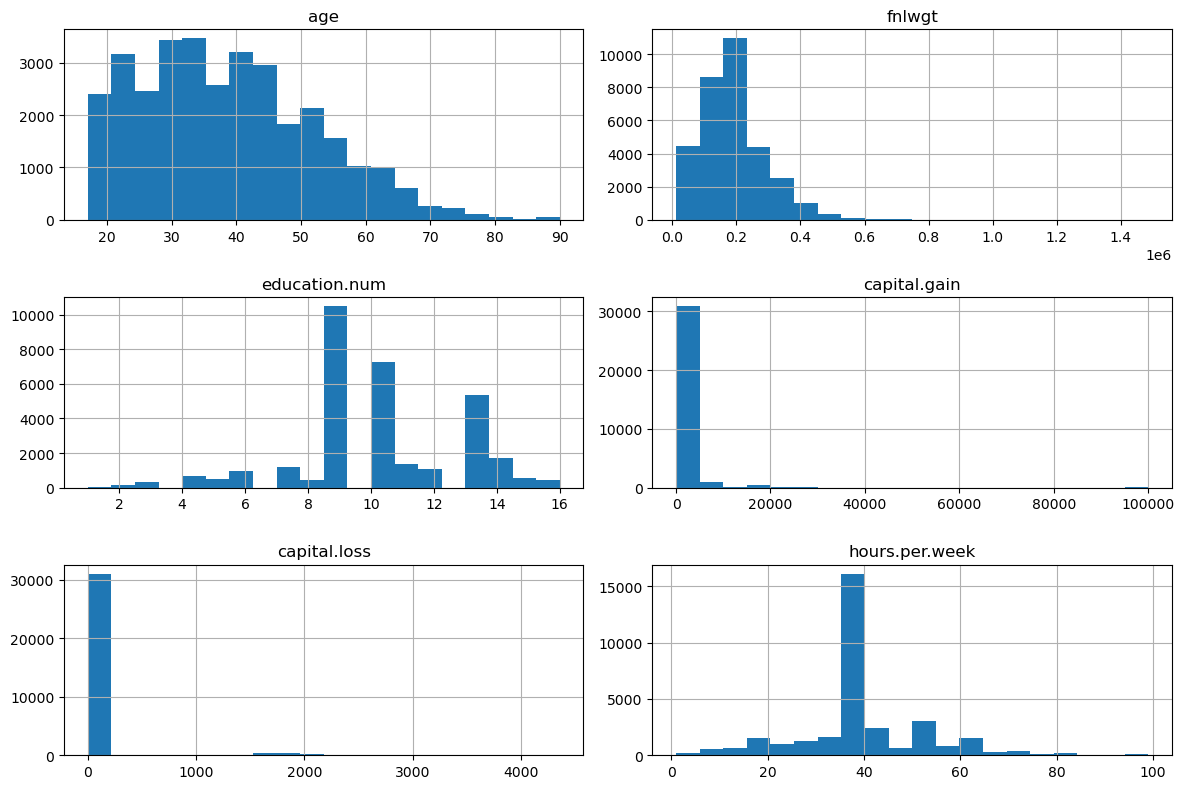

In [13]:
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


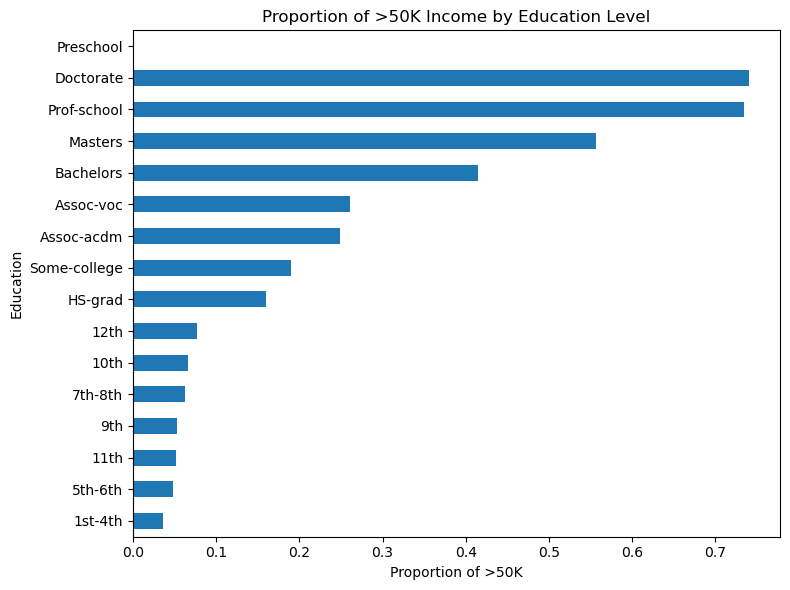

In [14]:
income_by_edu[">50K"].sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Proportion of >50K Income by Education Level")
plt.xlabel("Proportion of >50K")
plt.ylabel("Education")
plt.tight_layout()
plt.show()


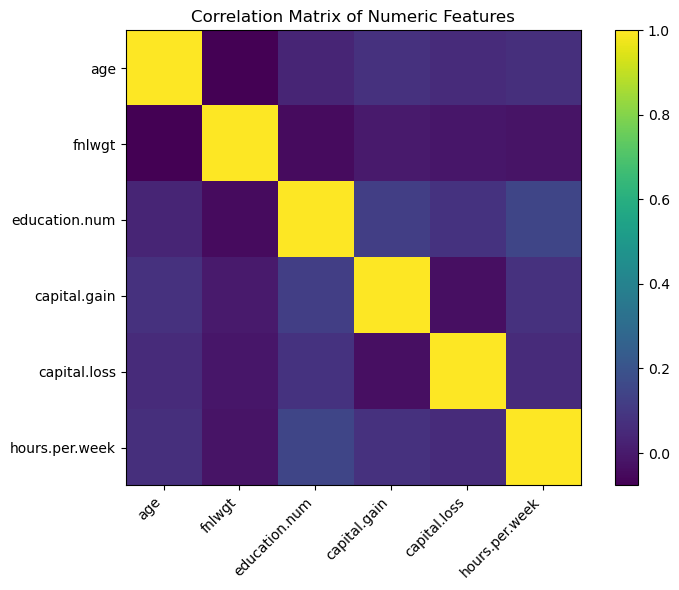

In [15]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()
